# This notebook generates figures presented in the article.

In [1]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.templates.default = "simple_white"

# import csv as dataframe
df = pd.read_csv(os.path.abspath('stats_and_tables/MPEA_dataset_for_stats.csv'))
#df = pd.read_csv(os.path.abspath('MPEA_dataset.csv'))

df_rt = df[(df['PROPERTY: Test temperature ($^\circ$C)'] >= 20) & (df['PROPERTY: Test temperature ($^\circ$C)'] <= 25)]
df.describe()

,Unnamed: 0,PROPERTY: grain size ($\mu$m),PROPERTY: ROM Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Elongation plastic (%),PROPERTY: ROM Young modulus (GPa),PROPERTY: Exp. Young modulus (GPa),PROPERTY: O content (wppm),PROPERTY: C content (wppm),Internal Reference #,PROPERTY: Exp. Density (g/cm$^3$),IDENTIFIER: Reference ID,REFERENCE: year,PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: Calculated Young modulus (GPa)
count,1550.000000,237.000000,614.000000,535.000000,1364.000000,1066.000000,543.00000,637.000000,139.000000,226.000000,145.000000,57.000000,4.000000,156.000000,114.000000,1550.000000,1550.000000,1550.000000,738.000000
mean,403.723226,90.222121,7.763681,483.927290,229.073900,889.914531,1182.23453,30.537724,16.868201,170.163717,124.972414,764.000000,19911.750000,61.692308,7.589702,134.759355,2016.215484,7.980581,166.947154
std,250.546069,182.997396,1.758429,222.838407,380.633782,568.589154,716.20697,23.637427,16.077211,40.979630,56.943524,2084.998458,16142.818184,24.441534,2.490304,80.574580,3.721418,1.787325,48.962768
min,0.000000,0.018200,2.700000,94.700000,-268.800000,24.000000,80.00000,0.000000,0.000000,56.000000,16.600000,80.000000,1900.000000,8.000000,1.460000,1.000000,2004.000000,1.400000,72.000000
25%,193.250000,3.000000,6.700000,321.000000,25.000000,409.250000,682.50000,10.500000,5.850000,143.000000,83.500000,90.000000,8775.250000,38.750000,6.460000,62.000000,2015.000000,6.900000,112.500000
50%,387.000000,20.000000,7.400000,482.000000,25.000000,822.000000,1005.00000,27.100000,11.000000,181.000000,99.200000,100.000000,20683.500000,62.500000,7.753000,135.500000,2018.000000,7.800000,177.000000
75%,580.750000,92.000000,8.400000,630.000000,300.000000,1260.000000,1452.00000,50.000000,23.100000,198.750000,182.000000,200.000000,31820.000000,78.000000,8.680000,210.000000,2019.000000,8.500000,211.500000
max,935.000000,2000.000000,13.800000,1630.000000,1600.000000,3416.000000,4023.60000,189.200000,75.000000,258.000000,240.000000,7946.000000,36380.000000,114.000000,13.600000,266.000000,2019.000000,13.700000,298.000000


In [33]:
df_e = df_rt

def apply_neg_elong(row):
    
    val = row['PROPERTY: Elongation (%)']
    
    if np.isnan(val):
        return val
    else:
        if row['PROPERTY: Type of test'] == 'C':
            return -val
        else:
            return val

df_e['PROPERTY: Elongation (%)'] = df_e.apply(apply_neg_elong, axis=1)
df_e_BCC = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'BCC']
df_e_FCC = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'FCC']
df_e_other = df_e[df_e['PROPERTY: BCC/FCC/other'] == 'other']

fig = go.Figure()
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=28))
fig.update_layout(xaxis_title='Elongation (%)', yaxis_title='Yield Strengh (MPa)', width=1000, height=800)

fig.add_trace(go.Scatter(x=[0,0], y=[-100, 4100], line = dict(color='black', width=3, dash='dash'), name=''))

fig.add_trace(go.Scatter(x=df_e_other["PROPERTY: Elongation (%)"], y=df_e_other["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#f50e89', marker_size=8, marker_symbol='circle', name='other', 
                         hovertext=df_e_other['REFERENCE: doi']
                        ))

fig.add_trace(go.Scatter(x=df_e_BCC["PROPERTY: Elongation (%)"], y=df_e_BCC["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#0ef5de', marker_size=8, marker_symbol='diamond', name='BCC',
                        hovertext=df_e_BCC['REFERENCE: doi']
))

fig.add_trace(go.Scatter(x=df_e_FCC["PROPERTY: Elongation (%)"], y=df_e_FCC["PROPERTY: YS (MPa)"], 
                         mode='markers', marker_color='#f5b80e', marker_size=8, marker_symbol='square', name='FCC',
                        hovertext=df_e_FCC['REFERENCE: doi']
))
fig['layout']['yaxis'].update(range=[0, 3000], autorange=False)

fig.update_layout(
    annotations=[
        dict(
            x=-50,
            y=2500,
            text="Compression",
            ax=0,
            ay=0
        ),
         dict(
            x=50,
            y=2500,
            text="Tension",
            ax=0,
            ay=0
        )
    ])



# fig['layout']['xaxis'].update(range=[-100, 200], autorange=False)
fig.write_image("figures/ys_scatter.pdf", scale=1)
#fig.show()

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
fig = make_subplots(rows=1, cols=3)

y = 'PROPERTY: YS (MPa)'
x = 'PROPERTY: Test temperature ($^\circ$C)'

df_ys = df.dropna(subset=[x,y])
#df_ys = df[df[x]>0]

grey = 'grey'
blue = '#0ef5de'
yellow = '#f5b80e'
magenta = '#f50e89'

bcc_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='diamond')
bcc_bold_marker = dict(color = blue, size = 10, line = dict(color = blue, width = 1), symbol='diamond')

fcc_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='square')
fcc_bold_marker = dict(color = '#f5b80e', size = 10, line = dict(color = yellow, width = 1), symbol='square')


other_marker = dict(color = grey, size = 10, line = dict(color = grey, width = 1), symbol='circle')
other_bold_marker = dict(color = magenta, size = 10, line = dict(color = magenta, width = 1), symbol='circle')
        
samples = df_ys.groupby(['FORMULA', 'PROPERTY: synthesis method', 'PROPERTY: BCC/FCC/other',  'REFERENCE: doi'])



for s in samples:
    temps = s[1]['PROPERTY: Test temperature ($^\circ$C)']
    if len(s[1]) > 3 and len(temps.unique()) > 1:
        phase = s[1]['PROPERTY: BCC/FCC/other'].values[0]
        doi = s[1]['REFERENCE: doi'].values[0]
        sm = s[1]['PROPERTY: synthesis method'].values[0]
        hovertext=s[1]['FORMULA']

        if phase == 'BCC':
            if doi == '10.1016/j.msea.2017.10.073' and sm == 'CR':
                s[1][x] = s[1][x][::2].dropna().reset_index()
                s[1][y] = s[1][y][::2].dropna().reset_index()

            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_bold_marker, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=bcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=3)
            
        if phase == 'FCC':
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_bold_marker,  mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=fcc_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=3)
            
        if phase == 'other':
            #print(s[0], len(s[1]), temps)

            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_marker, opacity=0.4, mode='lines+markers', hovertext=hovertext), row=1, col=1)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_marker, opacity=0.4,  mode='lines+markers', hovertext=hovertext), row=1, col=2)
            fig.add_trace(go.Scatter(x=s[1][x], y=s[1][y], marker=other_bold_marker, mode='lines+markers', hovertext=hovertext), row=1, col=3)

            
for i in [1,2,3]:
    fig.update_yaxes(title_text='Yield Strength (MPa)', row=1, col=i)
    fig.update_xaxes(title_text='Temperature (°C)', row=1, col=i)
    
fig.update_layout(
    annotations=[
        dict(
            x=500,
            y=2500,
            text="BCC",
            ax=0,
            ay=0,
            xref='x1',
            yref='y1'
        ),
         dict(
            x=500,
            y=2500,
            text="FCC",
            ax=0,
            ay=0,
            xref='x2',
            yref='y2'
        ),
         dict(
            x=500,
            y=2500,
            text="other",
            ax=0,
            ay=0,
            xref='x3',
            yref='y3'
        )
    ])

fig.update_layout(font=dict(family="Barlow Semi Condensed", size=28)) 
fig.update_layout(showlegend=False)
fig.update_layout(width=2400, height=800)
fig.write_image("figures/YS_temp.pdf")
fig.write_html("figures/YS_temp.html")

#fig.show()

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



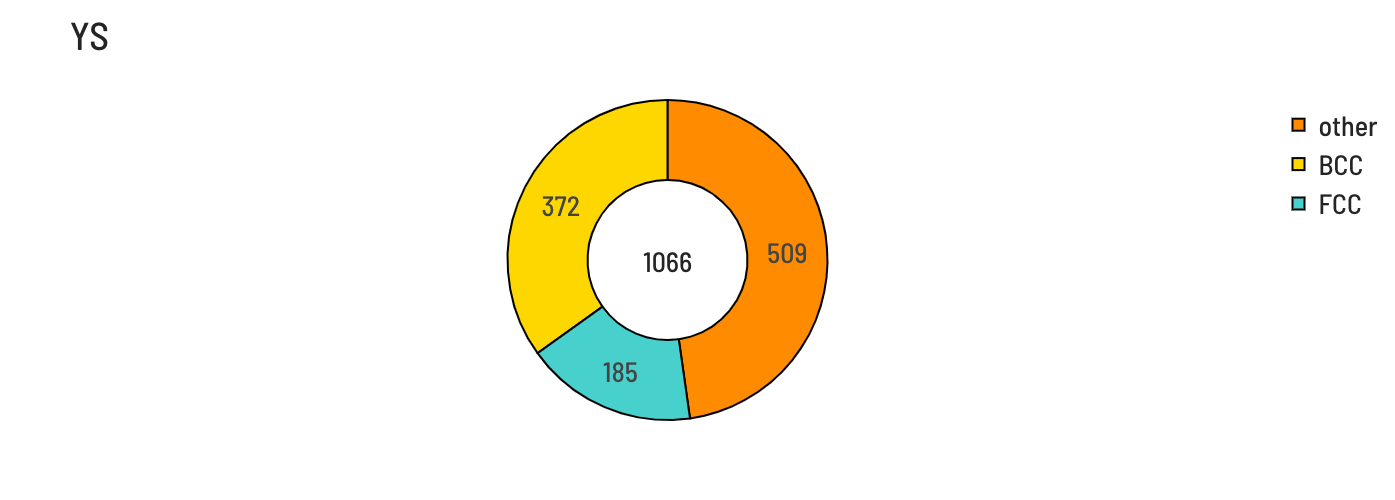

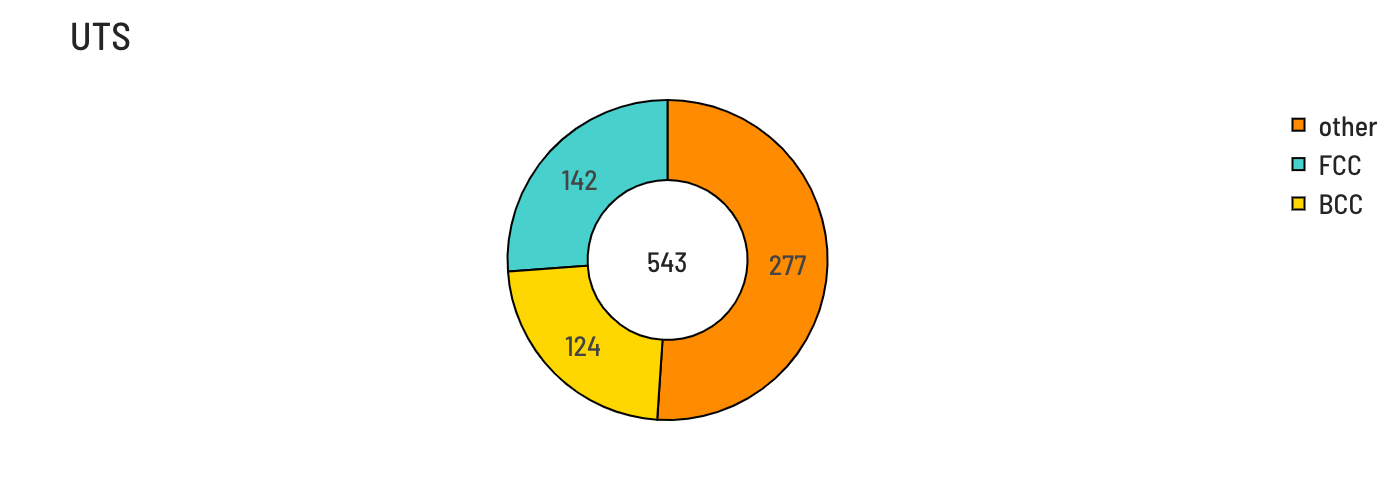

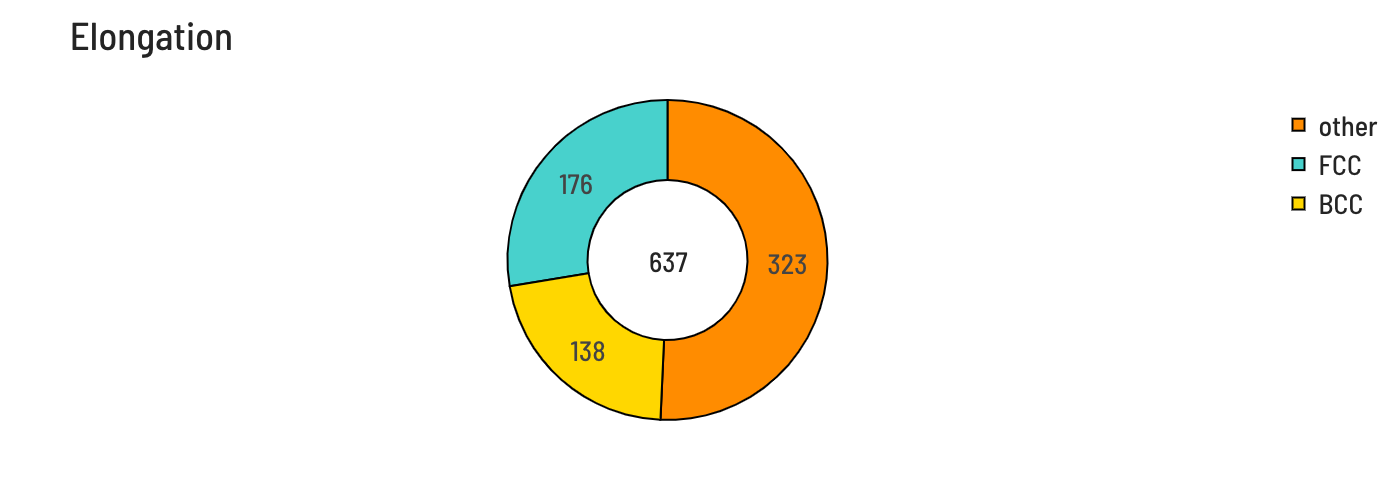

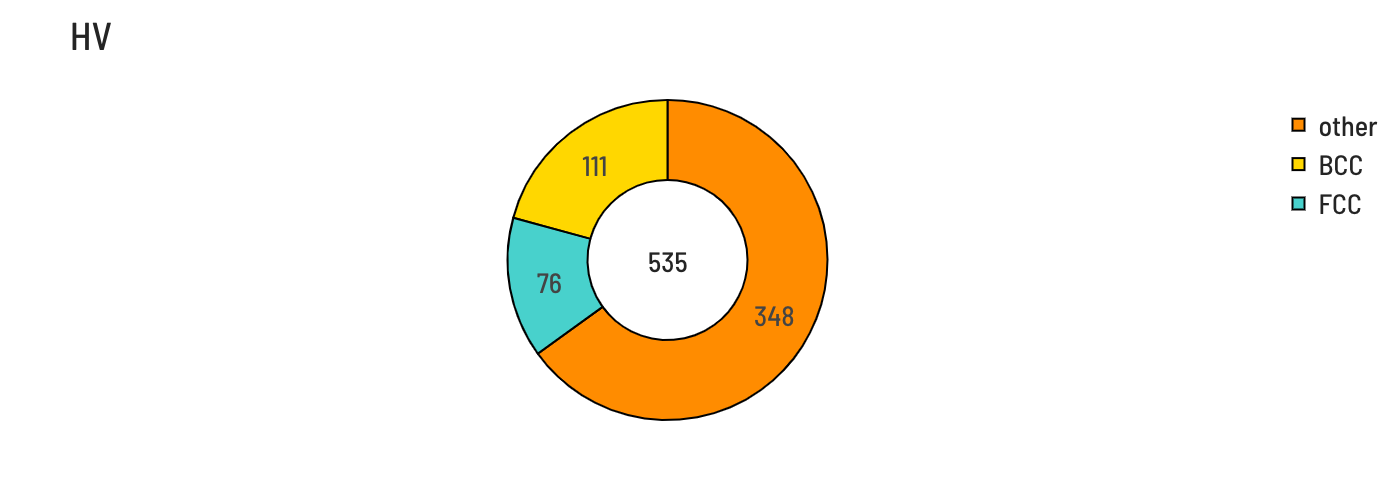

In [24]:
# DONUTS

def get_totals(df, prop, phase):
    df = df[df['PROPERTY: BCC/FCC/other'] == phase]
    total = len(df[prop].dropna())
    return total


phases = ['BCC', 'FCC', 'other']
props = ['PROPERTY: YS (MPa)', 'PROPERTY: UTS (MPa)', 'PROPERTY: Elongation (%)', 'PROPERTY: HV']
totals = {}
for prop in props:
    vals = [get_totals(df, prop, phase) for phase in phases]
    totals[prop] = vals

    labels = phases
    values = vals
    colors = ['gold', 'mediumturquoise', 'darkorange']
    prop_name = prop.split(':')[1].split('(')[0].strip()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
    fig.update_layout(font=dict(family="Barlow Semi Condensed", size=28), title=prop_name) 
    fig.update_layout(width=500, height=500)
    fig.update_traces(hoverinfo='label', textinfo='value', textfont_size=28,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
    fig.update_layout(annotations=[dict(text=sum(values), x=0.5, y=0.5, font_size=28, showarrow=False)])
    fig.write_image("figures/{}_donut.pdf".format(prop_name))
    fig.show()

In [36]:
# HEATMAP
# v2 - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from collections import Counter
from pymatgen import Composition
from pymatgen.core import periodic_table
import itertools


df = df.dropna(subset=['FORMULA'])
df['composition'] = df['FORMULA'].apply(Composition)
df['elements'] = df['FORMULA'].apply(lambda x: Composition(x).elements)
df_unique = df.drop_duplicates(subset='composition')
df_unique['elements'] = df_unique['FORMULA'].apply(lambda x: [str(i) for i in Composition(x).elements])

print(len(df_unique))

total_elements = []
for i in df_unique['elements']:
    total_elements.extend(i)

total_counts = Counter(total_elements).most_common()

all_elements = sorted(list(set(total_elements)))
all_elements = [(x, periodic_table.Element(x).number) for x in all_elements]
all_elements = sorted(all_elements, key=lambda e: e[1])
all_elements = [x[0] for x in all_elements]

print(all_elements)

ele_pairs = list(itertools.combinations(all_elements, 2))

print(len(ele_pairs))

ep_counts = {}
for ep in ele_pairs:
    count = 0 
    for elements in df_unique['elements']:
        if ep[0] in elements and ep[1] in elements:
            count += 1
    ep_counts[ep] = count
    
x = [i[0] for i in ele_pairs]
y = [i[1] for i in ele_pairs]
z = [ep_counts[i] for i in ele_pairs]


fig = go.Figure(data=go.Heatmap(z=z, x=x, y=y, hoverongaps = False, colorscale = 'Cividis'))
fig.update_layout(width=1000, height=1000)
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=18))

fig.update_layout(annotations=[dict(
    x=1.18, 
    align="right", 
    valign="top", 
    text='Number of records containing both elements', 
    showarrow=False, 
    xref="paper", 
    yref="paper", 
    xanchor="right",
    yanchor="middle",
    textangle=90)])

lines = go.Scatter(x=[0, 0.5, 1], y=[0, 0.5, 1], mode='lines', line_color='black', line_width=2.5)


#fig.show()
fig.write_image("figures/heatmap.png")


# fig = px.bar(x=[i[0] for i in total_counts], y=[i[1] for i in total_counts])
# fig.update_layout(font=dict(family="Barlow Semi Condensed", size=14))
# fig.update_layout(width=1000, height=1000)
# #fig.show()

/Users/chrisborg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



630
['Li', 'B', 'C', 'Mg', 'Al', 'Si', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Y', 'Zr', 'Nb', 'Mo', 'Pd', 'Ag', 'Sn', 'Nd', 'Hf', 'Ta', 'W', 'Re']
435
